# Introductory Machine Learning: Assignment 2

**Deadline:**

Assignment 2 is due Thursday, February 19 at 11:59pm. Late work will not be accepted as per the course policies (see the syllabus on [Canvas](https://canvas.yale.edu)).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas.  You can also post questions or start discussions on Ed Discussion. The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Submission:**

Submit your assignment as a .pdf on Gradescope. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. **Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to find your complete solution to each problem.**

To produce the .pdf, please convert to html and then print to pdf. (You may want to use your pdf print menu to scale the pages to be sure that cells are not truncated.) To convert to html, you can use this [converter notebook](https://colab.research.google.com/github/YData123/sds265-sp26/blob/main/assignments/Convert_ipynb_to_HTML_in_Colab.ipynb).


**Topics**
1. Logistic regression
2. Regularization
3. Stochastic gradient descent
4. Trees
5. Bias-variance tradeoff

## Problem 1: Penguins: An ice example (20 points)

Can you tell one penguin species from another? Let's put what we've learned about logistic regression to (a very cute) test!

<img src="https://github.com/YData123/sds265-sp26/raw/main/assignments/assn2/penguins_ds_species.png" width="500" align="center" style="margin:10px 30px 10px 0px">

We first need to learn a little about the anatomy of our flightless feathered friends. The *culmen* is the upper ridge of a bird’s bill.

<img src="https://github.com/YData123/sds265-sp26/raw/main/assignments/assn2/penguins_ds_culmen.png" width="500" align="center" style="margin:10px 30px 10px 0px">

In our dataset, the culmen length and depth are called `bill_length_mm` and `bill_depth_mm`.

*Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). Artwork by @allison_horst.


In [5]:
# run this cell to import needed packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# just run this cell to read in the data, and drop a couple variables

df = pd.read_csv('https://github.com/YData123/sds265-sp26/raw/main/assignments/assn2/penguins.csv')
df = df.drop(columns=['index','year','island'])
df = df.dropna(axis=0)
df



,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,male
1,Adelie,39.5,17.4,186.0,3800.0,female
2,Adelie,40.3,18.0,195.0,3250.0,female
4,Adelie,36.7,19.3,193.0,3450.0,female
5,Adelie,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,male
340,Chinstrap,43.5,18.1,202.0,3400.0,female
341,Chinstrap,49.6,18.2,193.0,3775.0,male
342,Chinstrap,50.8,19.0,210.0,4100.0,male


In [7]:
# Next we'll make the sex variable binary, and separate out
# species as the label to predict

species = list(set(df['species']))
df['class'] = LabelEncoder().fit_transform(df['species'])
sex = [int(list(df['sex'])[j]=='male') for j in range(len(df))]
df['sex'] = sex
df = df.drop(columns=['species'])
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,class
0,39.1,18.7,181.0,3750.0,1,0
1,39.5,17.4,186.0,3800.0,0,0
2,40.3,18.0,195.0,3250.0,0,0
4,36.7,19.3,193.0,3450.0,0,0
5,39.3,20.6,190.0,3650.0,1,0
...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1,1
340,43.5,18.1,202.0,3400.0,0,1
341,49.6,18.2,193.0,3775.0,1,1
342,50.8,19.0,210.0,4100.0,1,1


In [14]:
df['bill_length_mm']

,bill_length_mm
0,39.1
1,39.5
2,40.3
4,36.7
5,39.3
...,...
339,55.8
340,43.5
341,49.6
342,50.8


### 1.1 Plotting the data

The following cell shows a scatter plot of all pairs of variables. We showed this type of plot in class for the California housing data.
Describe several entries in this plot, and what it tells you about the
the relationship between the pairs of covariates. Do the relationships make intuitive sense? Why or why not? Do the data appear to have any obvious outliers or unusual patterns? Why or why not?


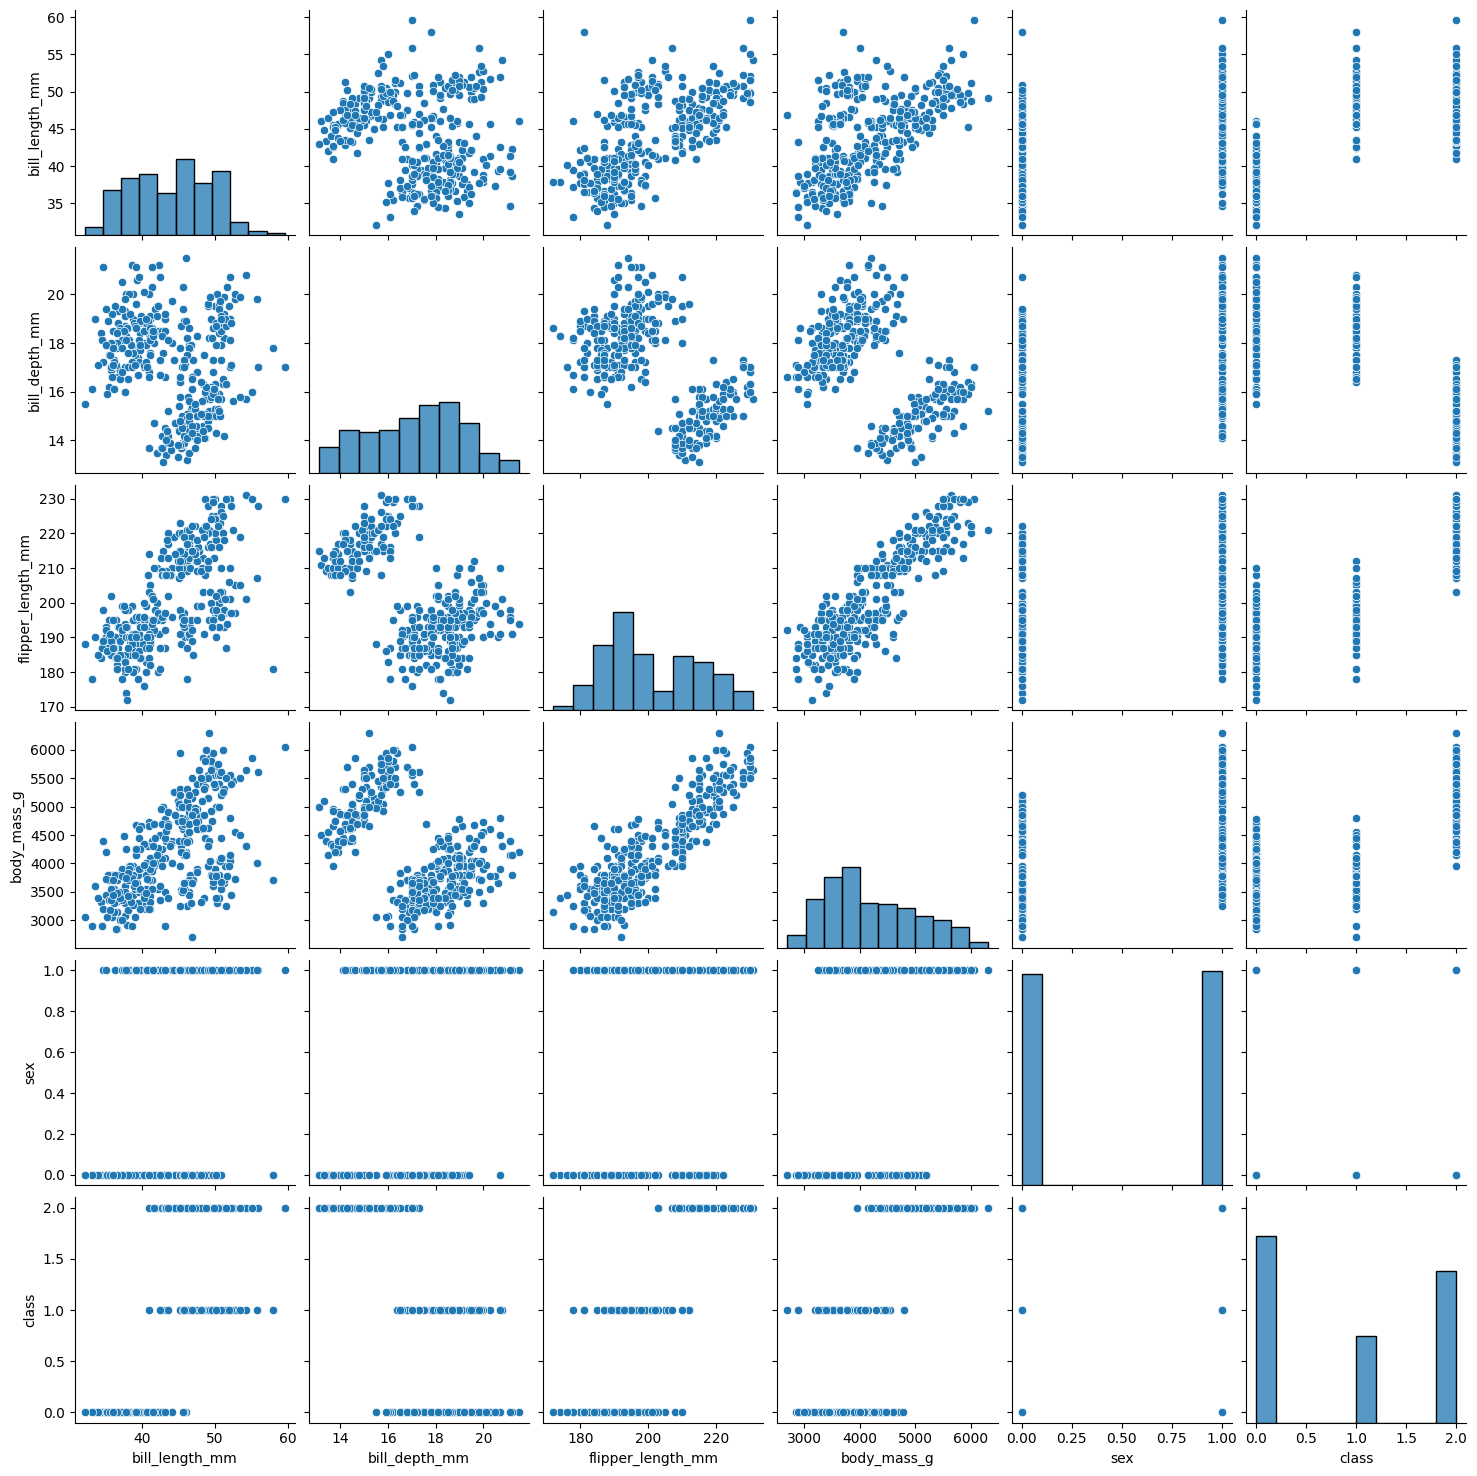

In [8]:
_ = sns.pairplot(df)

The pairwise scatter plot shows strong relationships among the continuous morphology variables. Flipper length and body mass exhibit a clear positive association, indicating that larger penguins tend to be heavier, which is intuitive given overall body size. Bill length also tends to increase with flipper length and body mass, suggesting that multiple size-related measurements scale together. In contrast, bill length versus bill depth does not follow a single linear trend and instead appears clustered, which plausibly reflects different groups (e.g., different classes/species) with distinct bill shapes rather than a simple size effect. Plots involving the discrete variables (sex and class) form horizontal/vertical bands because these variables take only a few distinct values. Overall, there are no obvious extreme outliers; most points fall within plausible ranges, and the most notable “unusual” pattern is the presence of clusters and banding, consistent with mixture structure and categorical covariates rather than data errors.

In [11]:
def plot_features(df, feature1_name, feature2_name):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    colors = ['orange', 'pink', 'lightgreen']
    species = ['Adelie', 'Chinstrap', 'Gentoo']

    for c in range(3):
        mask = (df['class']==c)
        plt.scatter(df[feature1_name][mask],
                    df[feature2_name][mask],
                    color=colors[c], label=species[c])

    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.legend(loc='upper left')
    plt.show()



### 1.1 Plotting the data (continued)

Next, using the `plot_features` function above,
give additional plots of pairs of features, shown together with
the class labels. An example of such a plot is shown below:

<img src="https://github.com/YData123/sds265-sp26/raw/main/assignments/assn2/feature_plot.jpg" width="500" align="center" style="margin:10px 30px 10px 0px">

For each plot, discuss why the pair of features may or not be helpful in discriminating between the three species of penguins.

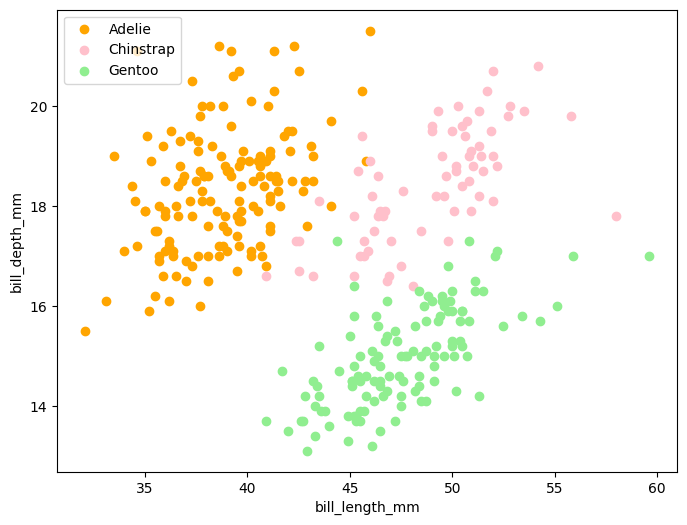

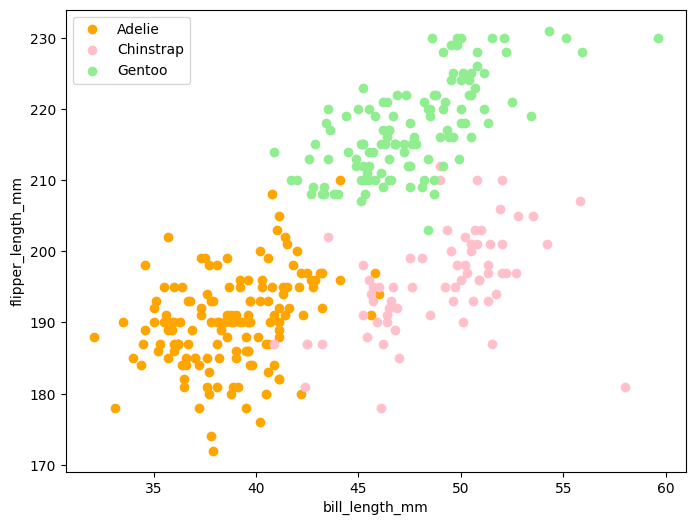

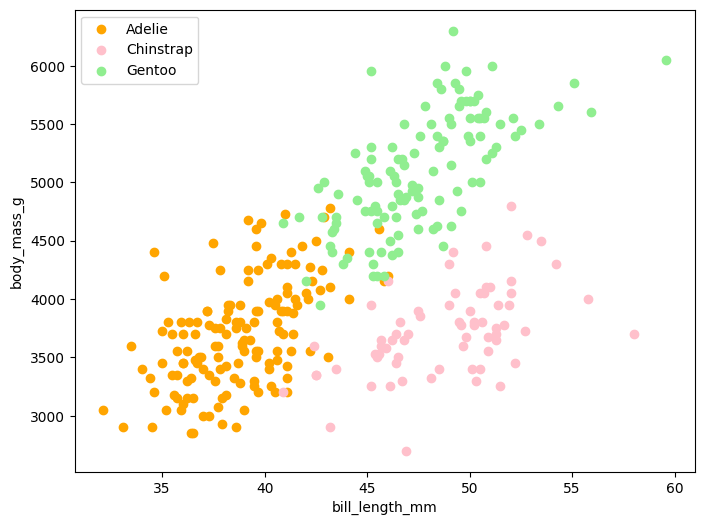

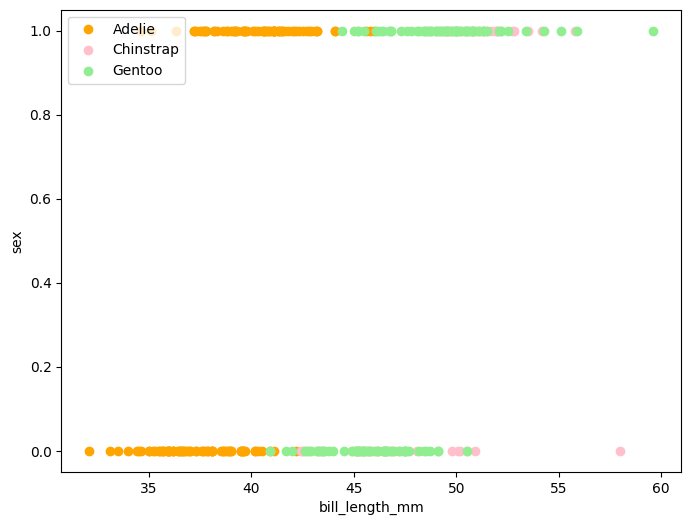

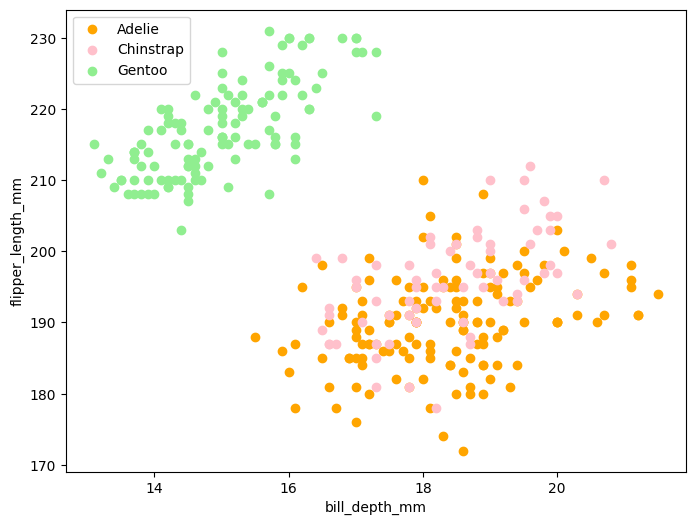

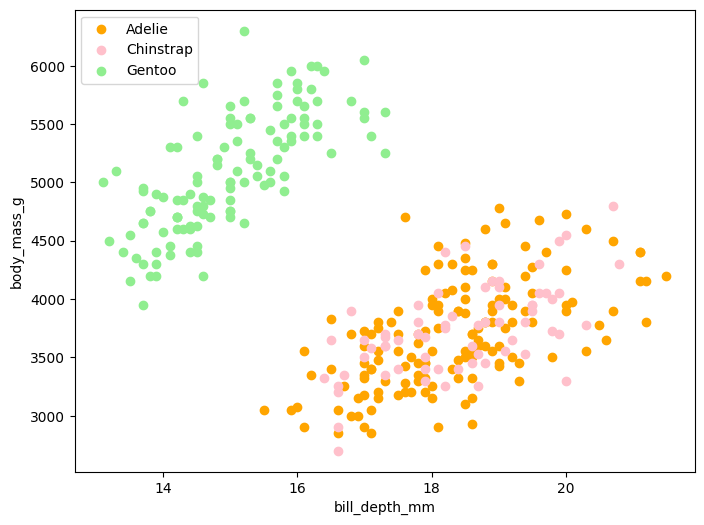

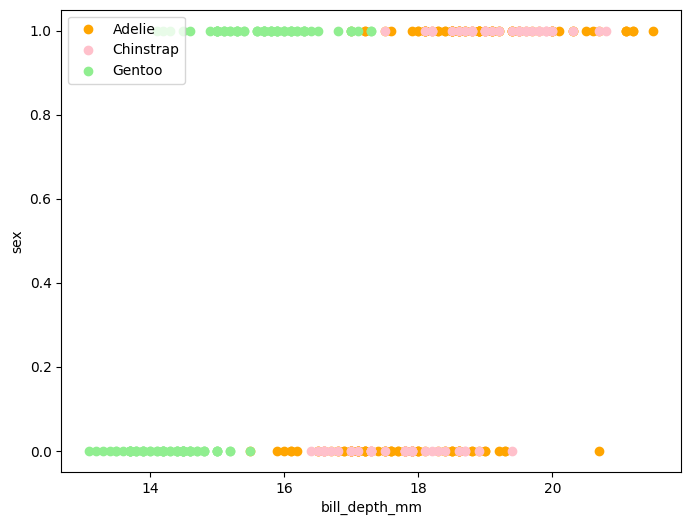

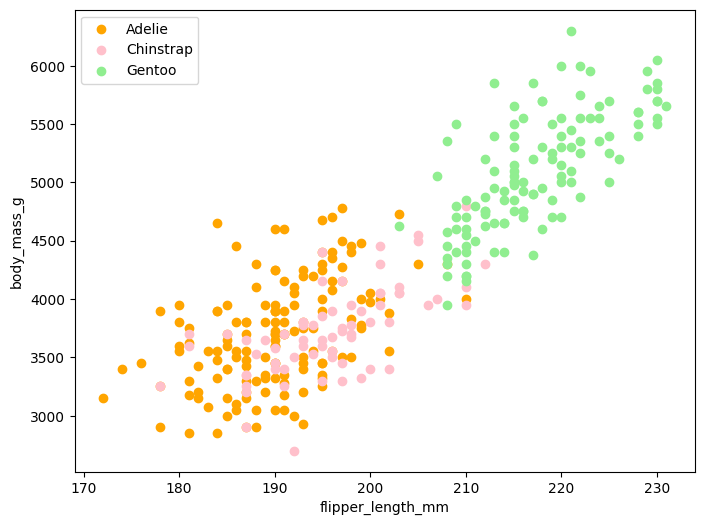

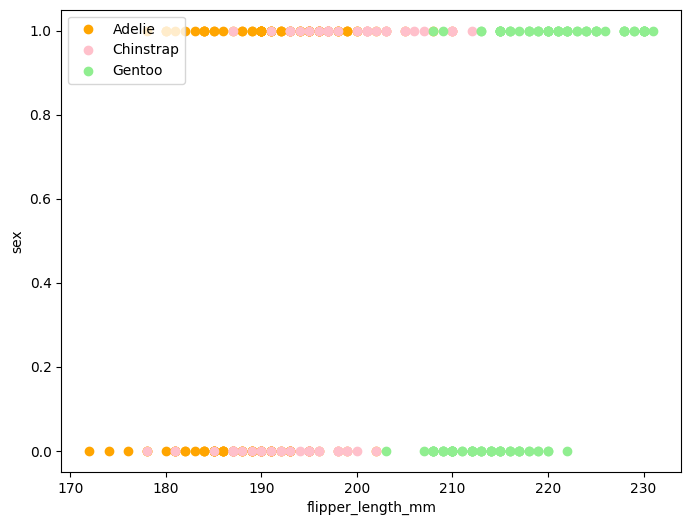

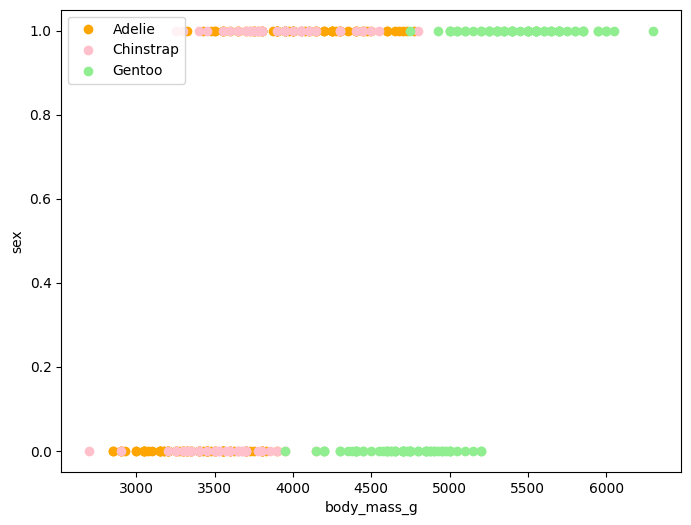

In [20]:
# your code and markdown here
columns = df.columns
columns = columns.drop('class')
for i in range(len(columns)):
  for j in range(i+1,len(columns)):
    plot_features(df, columns[i], columns[j])

In [21]:
# Just run the following cell, to get inputs X and labels y
y = np.array(df['class'])
X = df.copy()
X = X.drop(columns=['class'])
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,1
340,43.5,18.1,202.0,3400.0,0
341,49.6,18.2,193.0,3775.0,1
342,50.8,19.0,210.0,4100.0,1


### 1.2 Standardize the data

Next, standardize the data, so that each column of `X` has
mean zero and standard deviation one. Note that after you have done this transformation, `X` should still be a `pandas.DataFrame`. Then, briefly explain why it is important to standardize the variables in the logistic regression models that you will train below.

In [35]:
# Your code here
for column in X.columns:
  data = X[column]
  mu = data.mean()
  sd = data.std()
  X[column] = (data-mu)/sd



Standardization is important for logistic regression because the predictors are on very different scales (e.g., body mass is in thousands while bill measurements are in tens); without scaling, large-magnitude features can dominate the optimization and make the fitted coefficients hard to compare. Putting all features on the same scale typically improves numerical stability and convergence of gradient-based solvers, and it ensures that regularization (if used) penalizes coefficients fairly across predictors rather than disproportionately shrinking those measured in smaller units.


### 1.3 Fit logistic regressions

As done in the class demo for mushrooms and iris flowers, you will now  construct a series of logistic regression models using an increasing number of training points.

Specifically, we want you to:

* Vary the sample size from 10% of the data to 90% of the data, in increments of 10%
* For each sample size, train a logistic regression model on randomly selected training points, and test on the remaining data
* For each sample size, run 100 trials and average the error rates
* Plot the resulting average error rates as a function of sample percentage of the data

We will use the function sklearn.model_selection.train_test_split in each trial to randomly split the data into training and test sets.

Here we repeat exactly what we did during class using `lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')` to fit a logistic regression model to predict the three species  (*Adelie*, *Chinstrap*, and *Gentoo*).

After filling in your code, simply run this cell to plot a learning curve of error rate as a function of training percentage.


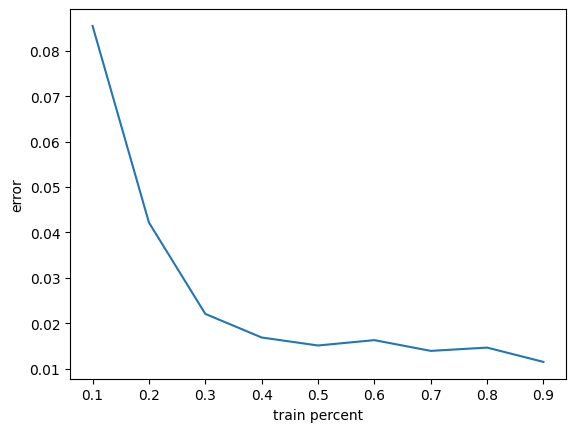

In [64]:
lr = LogisticRegression(penalty='l2', C=.1, solver='lbfgs')

lr_error_rate = []
trials = 100
train_percent = np.linspace(.1, .9, 9)

# For each training set percentage, create train/test split accordingly
# and run logistic regression 100 times and calculate the average error rate

"""
function input:
  X: data
  y: label
  ratio: train data percentage
  trails: number of trails to run

function return:
  the average error rate with this train data percentage
"""

def get_err_rate(X, y, ratio, trials):
    # todo:
    # your code starts here
    err = []
    for i in range(trials):
      X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=ratio)
      lr.fit(X_train,y_train)
      test_err = np.mean(lr.predict(X_test)!=y_test)
      err.append(test_err)
    return np.mean(err)

    # your code ends here

# Use get_err_rate to find the error rate for respective split size
for p in train_percent:
    lr_error_rate.append(get_err_rate(X, y, p, trials))


plt.plot(train_percent, lr_error_rate)
plt.xlabel('train percent')
plt.ylabel('error')
plt.show()

### 1.4 Choose good feature pairs

Which pair of variables gives the best predictions of the species of penguins? Run some experiments and report back below!

Note that there are ${5 \choose 2} = 10$ ways you can choose a pair of features. You may want to run a loop to automate this. And choose a reasonable `ratio` from the stable region of plot 1.3, such as 0.7 :)




In [65]:
# todo:
# your code starts here
err_rate = {}
for i in range(len(columns)):
  for j in range(i+1,len(columns)):
    err_rate[(columns[i],columns[j])]=get_err_rate(X[[columns[i],columns[j]]], y, 0.9, trials)

min_key = min(err_rate, key=err_rate.get)
print('The pair of variables that gives the best predictions of the species of penguins is', min_key)
# your code ends here

The pair of variables that gives the best predictions of the species of penguins is ('bill_length_mm', 'flipper_length_mm')


### 1.5 Visualize the decision boundries

Using the two features you chose as the best, and at least two additional
pairs of features, visualize the decision boundries of the logistic regression models.

Is it what you expected? Where are you observing incorrect predictions? Describe why the decision boundaries make sense, from your understanding of the logistic regression model.

Use the function `plot_decision_boundaries` that we supply below. (You may also modify this function to your liking.) An example plot is shown here:

<img src="https://github.com/YData123/sds265-sp26/raw/main/assignments/assn2/sample_decision_boundaries.jpg" width="400" align="center" style="margin:10px 30px 10px 0px">


In [74]:
def plot_decision_boundaries(X, y, model, error):
    X2 = np.array(X)
    b = model.intercept_
    beta = model.coef_.T
    colors = ['orange', 'pink', 'lightgreen']
    h = 0.015
    x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
    y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], beta) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8,8))
    plt.contourf(xx, yy, Z, levels=[0,.5,1.5,2.5], colors=colors, alpha=0.5)
    for c in range(3):
        mask = (y==c)
        plt.scatter(X2[np.array(mask),0], X2[np.array(mask),1], color=colors[c], label=species[c])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend(loc='upper left')
    plt.title('error rate: %.2f' % error)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])


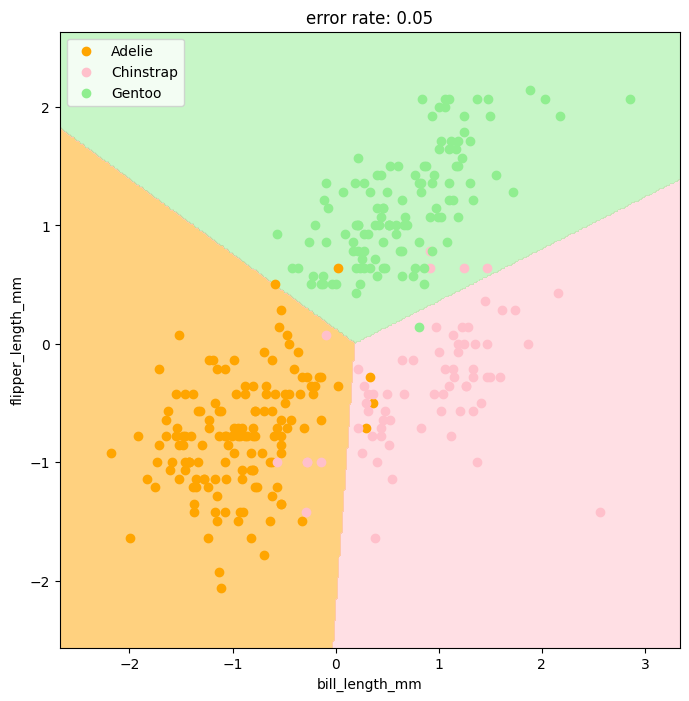

In [75]:
# Your code and markdown here
X_best = X[[min_key[0], min_key[1]]]

lr_plot = lr
lr_plot.fit(X_best, y)

plot_decision_boundaries(X_best, y, lr_plot, err_rate[min_key])



Using the best-performing feature pair (bill_length_mm, flipper_length_mm), the multinomial logistic regression produces three linear decision regions, one for each species. This is broadly expected because logistic regression with two standardized features yields linear (piecewise) boundaries in the 2D plane. The plot shows that Adelie points cluster mostly in the lower-left region (shorter bills and shorter flippers), Gentoo points cluster mostly in the upper region (longer flippers), and Chinstrap points concentrate on the right-lower region (longer bills with relatively shorter flippers). Most incorrect predictions occur near the boundaries where the classes overlap, especially around the central transition area where a few Chinstrap and Adelie observations lie close to each other, and where some Gentoo points approach the separation line. These errors are reasonable since the model is linear and cannot perfectly separate all three species when their measurements overlap in this two-feature projection, so borderline points are the most likely to be misclassified.

### 1.6 (Optional) Use different regularization levels (2 points EC)

Now that you have a working logistic regression algorithm, explore how to set the regularization level $C=1/\lambda$. Use an appropriate cross-validation procedure to choose the regularization level, and explain your results.

100%|██████████| 99/99 [00:19<00:00,  5.07it/s]


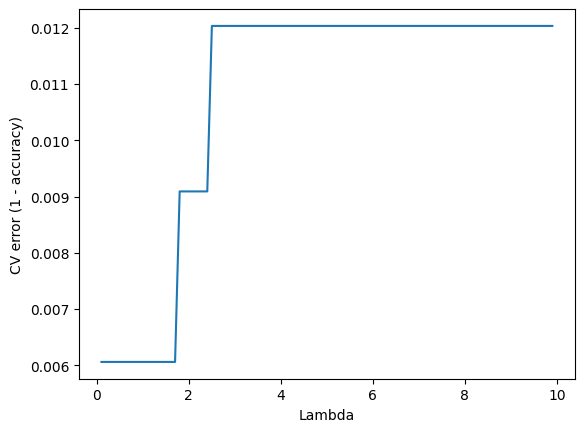

Best lambda: 0.1   Best CV error: 0.0060606060606061


In [97]:
# Your code and markdown here
from sklearn.model_selection import StratifiedKFold, cross_val_score
from tqdm import tqdm

Lambda = np.arange(0.1,10,0.1)


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

cv_error = []
for lam in tqdm(Lambda):
    model = LogisticRegression(penalty="l2",C=1/lam,solver="lbfgs")
    acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    cv_error.append(1 - acc.mean())

plt.plot(Lambda, cv_error)
plt.xlabel("Lambda")
plt.ylabel("CV error (1 - accuracy)")
plt.show()

best_lam = Lambda[np.argmin(cv_error)]
print("Best lambda:", best_lam, "  Best CV error:", min(cv_error))


In the experiment, the \textbf{best} regularization level was $\lambda = 0.1$ (the largest $C$ in our grid),
with a \textbf{minimum CV error} of approximately $0.0061$.
As $\lambda$ increased (stronger regularization), the CV error increased and then plateaued.
This suggests that, for this dataset, logistic regression using the standardized features already generalizes well with relatively weak regularization;
increasing $\lambda$ primarily shrinks coefficients and adds bias without a compensating reduction in variance.

Hooray! You are now a penguin master!

## Problem 2: Mini-Batch Gradient Descent (25 points)

Consider a univariate logistic regression where we are trying to predict $Y$, which can take the value $0$ or $1$, from the variable $X$, which takes real values. Recall from lecture that we need to estimate parameters $\beta_{0}$ and $\beta_{1}$ by minimizing the penalized loss function:

$L(\beta_{0}, \beta_{1}) = \frac{1}{n}\sum\limits_{i=1}^{n} \left[ log\left( 1 + e^{\beta_{0} + X_{i}\beta_{1}}\right) - Y_{i}\left(\beta_{0} + X_{i}\beta_{1}\right)\right] + \lambda \beta_{1}^{2}$ .

Note that generally the intercept is not penalized.

In this problem, we will implement mini-batch gradient descent. At each iteration, a random set of $m$ samples from all $n$ samples is used to calculate the loss and gradient, which is the change in the loss with respect to the parameters. We then update the estimates of $\beta_{0}$ and $\beta_{1}$ based on the gradient.

Run the next cell to simulate data using the parameter values of $\beta_{0} = 3$ and $\beta_{1} = -5$.

In [122]:
n = 10000
np.random.seed(265)
x1 = np.random.uniform(-5, 5, size=n)
beta0 = 3
beta1 = -5
p = np.exp(beta0 + x1*beta1)/(1 + np.exp(beta0 + beta1*x1))
y = np.random.binomial(1, p, size=n)


Here is a helper function for plotting we'll use later. Just run this cell; don't change it.

In [111]:
def plot_betas_and_loss(beta0_all, beta1_all, loss_all, title=''):
    fig, ax = plt.subplots(1, 3, figsize=(18,5))
    ax[0].plot(np.arange(len(beta0_all)), beta0_all)
    ax[0].hlines(beta0, xmin=0, xmax=len(beta0_all),color = 'r')
    ax[0].set_xlabel("Iteration", fontsize=12)
    ax[0].set_ylabel(r"$\widehat{\beta}_{0}$", fontsize=12)

    ax[1].plot(np.arange(len(beta1_all)), beta1_all)
    ax[1].hlines(beta1, xmin=0, xmax=len(beta1_all),color = 'r')
    ax[1].set_xlabel("Iteration", fontsize=12)
    ax[1].set_ylabel(r"$\widehat{\beta}_{1}$", fontsize=12)
    ax[1].set_title(title)

    ax[2].plot(np.arange(len(loss_all)), loss_all)
    ax[2].set_xlabel("Iteration", fontsize=12)
    ax[2].set_ylabel("Loss", fontsize=12)
    plt.show()

### 2.1 Deriving the updates

Let $L_{t}(\beta_{0}, \beta_{1})$ be the loss at $t$-th iteration.
For given values of $\beta_{0}$ and $\beta_{1}$, the vector $\left( \dfrac{\partial}{\partial \beta_{0}} L_{t}(\beta_{0}, \beta_{1}), \dfrac{\partial}{\partial \beta_{1}} L_{t}(\beta_{0}, \beta_{1}) \right)^{T}$ is called the gradient of $L_{t}(\beta_{0}, \beta_{1})$ and is denoted $\nabla L_{t}(\beta_{0}, \beta_{1})$.

We calculate the derivative of $L_{t}(\beta_{0}, \beta_{1})$ with respect to $\beta_{0}$, treating $\beta_{1}$ as a constant. (i.e. calculate $\dfrac{\partial}{\partial \beta_{0}} L_{t}(\beta_{0}, \beta_{1})$):

$\dfrac{\partial}{\partial \beta_{0}} L(\beta_{0}, \beta_{1}) = \frac{1}{n}\sum\limits_{i=1}^{n} \left(\dfrac{e^{\beta_{0} + X_{i}\beta_{1}}}{1+e^{\beta_{0} + X_{i}\beta_{1}}}- Y_{i}\right)$.



Now calculate the derivative of $L_{t}(\beta_{0}, \beta_{1})$ with respect to $\beta_{1}$, treating $\beta_{0}$ as a constant. (i.e. calculate $\dfrac{\partial}{\partial \beta_{1}} L_{t}(\beta_{0}, \beta_{1})$).

Be sure to show your work by either typing it in here using LaTeX, or by taking a picture of your handwritten solutions and displaying them here in the notebook. (If you choose the latter of these two options, be sure that the display is large enough and legible. Please also upload a photo seperately to Gradescope in case the embedded image failed.)

**[put your solution here]**
$$
L(\beta_0,\beta_1)=\frac{1}{n}\sum_{i=1}^n\left[\log\left(1+e^{\beta_0+X_i\beta_1}\right)-Y_i(\beta_0+X_i\beta_1)\right]+\lambda \beta_1^2
$$

Let
$$
\qquad Z_i=\beta_0+X_i\beta_1,\qquad \sigma(Z)=\frac{1}{1+e^{-Z}}.
$$

We have
$$
\frac{\partial}{\partial Z_i}\log\left(1+e^{Z_i}\right)=\frac{e^{Z_i}}{1+e^{Z_i}}=\sigma(Z_i),
\qquad \frac{\partial Z_i}{\partial \beta_1}=X_i.
$$

$$
\frac{\partial}{\partial \beta_1}\left[\log\left(1+e^{Z_i}\right)-Y_i Z_i\right]
=\sigma(Z_i)\,X_i-Y_i X_i
=X_i\left(\sigma(Z_i)-Y_i\right).
$$

$$
\frac{\partial}{\partial \beta_1}\left(\lambda \beta_1^2\right)=2\lambda\beta_1.
$$

$$
\frac{\partial L}{\partial \beta_1}
=\frac{1}{n}\sum_{i=1}^n X_i\left(\sigma(\beta_0+X_i\beta_1)-Y_i\right)+2\lambda\beta_1
$$

Finally we get:
$$
\boxed{
\frac{\partial L}{\partial \beta_1}
=\frac{1}{n}\sum_{i=1}^n X_i\left(\frac{e^{\beta_0+X_i\beta_1}}{1+e^{\beta_0+X_i\beta_1}}-Y_i\right)+2\lambda\beta_1
}
$$



When we implement mini-batch stochastic gradient descent, we will use these formulas, but
apply them to a mini-batch of $m$ randomly chosen datapoints, rather than to all $n$ datapoints
(in our case $n=10,000$).
Typically $m$ is chosen to be much, much smaller than $n$.




### 2.2 The key ingredients

Complete the function `update` in the following cell which takes values for $\beta_{0}$ and $\beta_{1}$, a list `inds`  containing the indexes of the $m$ selected samples, as well as a step-size $\eta$, and returns updated values for $\beta_{0}$ and $\beta_{1}$ from one step of gradient descent (using all the data and your answer to Part a).

In [141]:
def update(b0, b1, inds, step_size, lamb):

    m = len(inds)
    x_inds = x1[[inds]]
    y_inds = y[[inds]]
    yh = b0+b1*x_inds
    logi = np.exp(yh)/(1+np.exp(yh))

    L_partial0 = 1/m*np.sum(logi-y_inds)
    L_partial1 = 1/m*np.sum(x_inds*(logi-y_inds)+2*lamb*b1)+lamb*b1**2

    b0 -= step_size * L_partial0
    b1 -= step_size * L_partial1
    return (b0, b1)

Now complete the function in the next cell called `loss` which takes values for $\beta_{0}$ and $\beta_{1}$,
together with a subset of indices and regularization parameter, and returns the value of the loss function evaluated at those data points.

In [142]:
def loss(b0, b1, inds, lamb):

    m = len(inds)
    x_inds = x1[[inds]]
    y_inds = y[[inds]]
    yh = b0+b1*x_inds
    logi = np.exp(yh)/(1+np.exp(yh))

    output = 1/m*np.sum(np.log(1+np.exp(yh)-y_inds*yh))

    return output

### 2.3 Putting it all together

Now complete the implementation of `minibatch_grad_descent` which puts all of these pieces together

In [147]:
def minibatch_grad_descent(b0=0, b1=0, batch_size=100, step_size=10, lamb=0, iterations=1000):
    beta0_hat = b0
    beta1_hat = b1
    beta0_all = []
    beta1_all = []
    loss_all = []

    for iter in range(iterations):
        inds = np.random.choice(10000, size=100, replace=False)
        batch_loss = loss(beta0_hat,beta1_hat,inds,lamb)
        beta0_hat, beta1_hat = update(beta0_hat,beta1_hat,inds,step_size,lamb)

        beta0_all.append(beta0_hat)
        beta1_all.append(beta1_hat)
        loss_all.append(batch_loss)

    return (beta0_hat, beta1_hat, beta0_all, beta1_all, loss_all)

Now, test your implementation by running the following cell, which will call the function
with the default parameters, and then plot the beta parameters and loss during the course
of stochastic gradient descent. We will check your plot as a first check that you have a correct implementation! You should expect the first plot looks like the following:

<img src="https://github.com/YData123/sds265-sp26/raw/main/assignments/assn2/mini_batch_gd.png" width="400" align="center" style="margin:10px 30px 10px 0px">

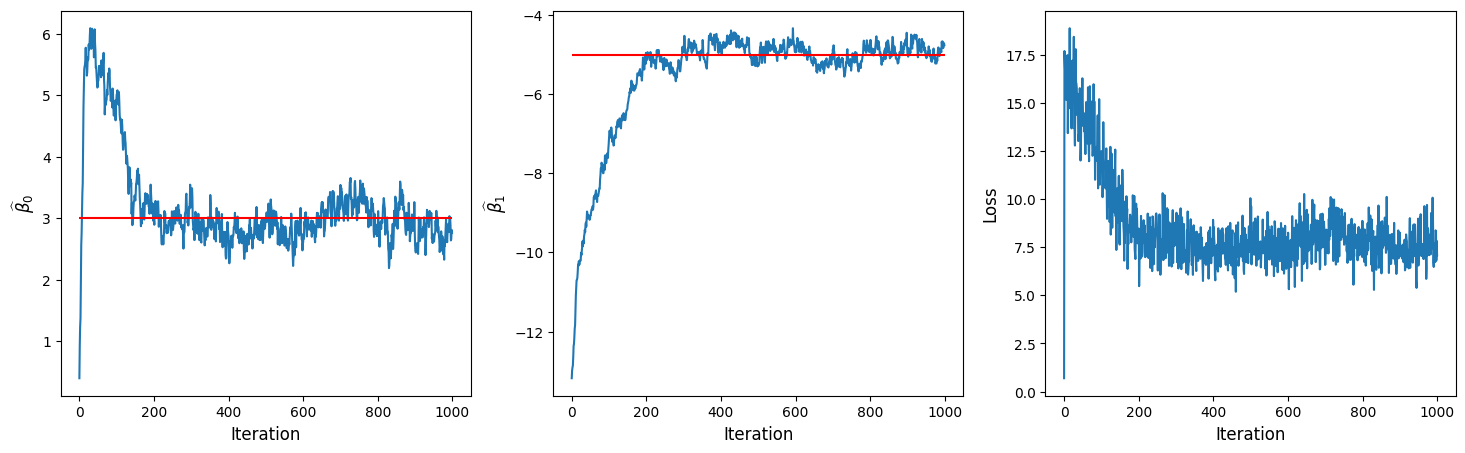

In [148]:
# Run this cell, don't change it!

beta0_hat, beta1_hat, beta0_all, beta1_all, loss_all = minibatch_grad_descent()
plot_betas_and_loss(beta0_all, beta1_all, loss_all)


### 2.4 Assessing uncertainty

We now use the code above that implements mini-batch gradient descent and
run it several (30) times. We then display the mean and standard deviation of
the estimates.


In [149]:
# run this cell, don't change it

from tqdm import tqdm

beta0_hat_all_0 = []
beta1_hat_all_0 = []
for rep in tqdm(range(30)):
    beta0_hat, beta1_hat, _, _, _ = minibatch_grad_descent()
    beta0_hat_all_0.append(beta0_hat)
    beta1_hat_all_0.append(beta1_hat)

print('The mean of the estimated beta0 is %.2f' % np.mean(beta0_hat_all_0))
print('The standard deviation of the estimated beta0 is %.3f' % np.std(beta0_hat_all_0))
print('The mean of the estimated beta1 is %.2f' % np.mean(beta1_hat_all_0))
print('The standard deviation of the estimated beta1 is %.3f' % np.std(beta1_hat_all_0))

100%|██████████| 30/30 [00:07<00:00,  3.87it/s]

The mean of the estimated beta0 is 2.96
The standard deviation of the estimated beta0 is 0.147
The mean of the estimated beta1 is -4.81
The standard deviation of the estimated beta1 is 0.217


Comment on these results:

1. Describe what causes the variation in the estimates.
1. How would you construct approximate 95% confidence intervals for the estimates?
1. Do the true parameters fall in those confidence intervals?

**[Put your answers in this markdown cell]**
The estimates vary across the 30 repetitions mainly because each run uses random mini-batches (and potentially different random initializations), so the stochastic gradients are noisy and the algorithm converges to slightly different solutions. Finite-sample randomness in the simulated data also contribute small differences in the fitted coefficients.

The confidencial intervals are:
\begin{align*}
\beta_0:\quad & 2.96 \pm 1.96(0.147) \approx [2.67,\; 3.25],\\
\beta_1:\quad & -4.81 \pm 1.96(0.217) \approx [-5.24,\; -4.38].
\end{align*}

The true parameters $\beta_0=3$ and $\beta_1=-5$ both fall within these confidence intervals, which is consistent with the estimator being reasonably accurate.

### 2.5 Comparing regularization levels

Repeat 2.3 with different $\lambda$ (the regularization level), e.g. $\lambda=0$, $\lambda=.001$, and $\lambda=.005$. Use (0,0) as the initial estimates of $\beta_{0}$ and $\beta_{1}$. Plot $\beta_{0}$, $\beta_{1}$, and $L(\beta_{0}, \beta_{1})$ vs. iteration number. How do the plots change as you change $\lambda$? Are the changes consistent with your expectation? Why or why not?

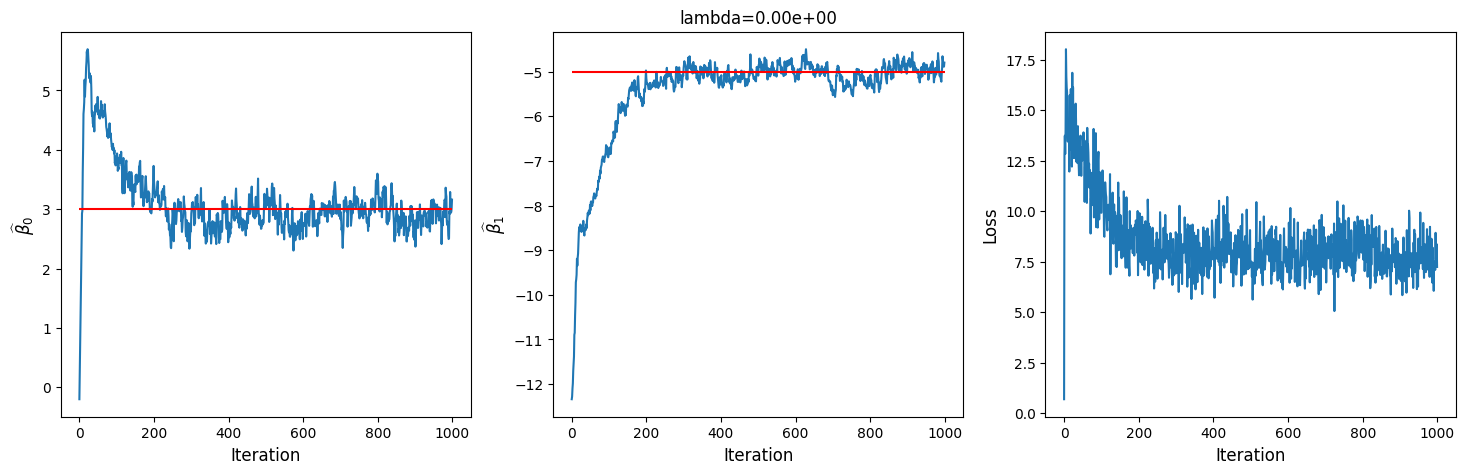

/tmp/ipython-input-3252129741.py:7: RuntimeWarning: overflow encountered in exp
  logi = np.exp(yh)/(1+np.exp(yh))
/tmp/ipython-input-3252129741.py:7: RuntimeWarning: invalid value encountered in divide
  logi = np.exp(yh)/(1+np.exp(yh))
/tmp/ipython-input-3252129741.py:9: RuntimeWarning: overflow encountered in exp
  output = 1/m*np.sum(np.log(1+np.exp(yh)-y_inds*yh))


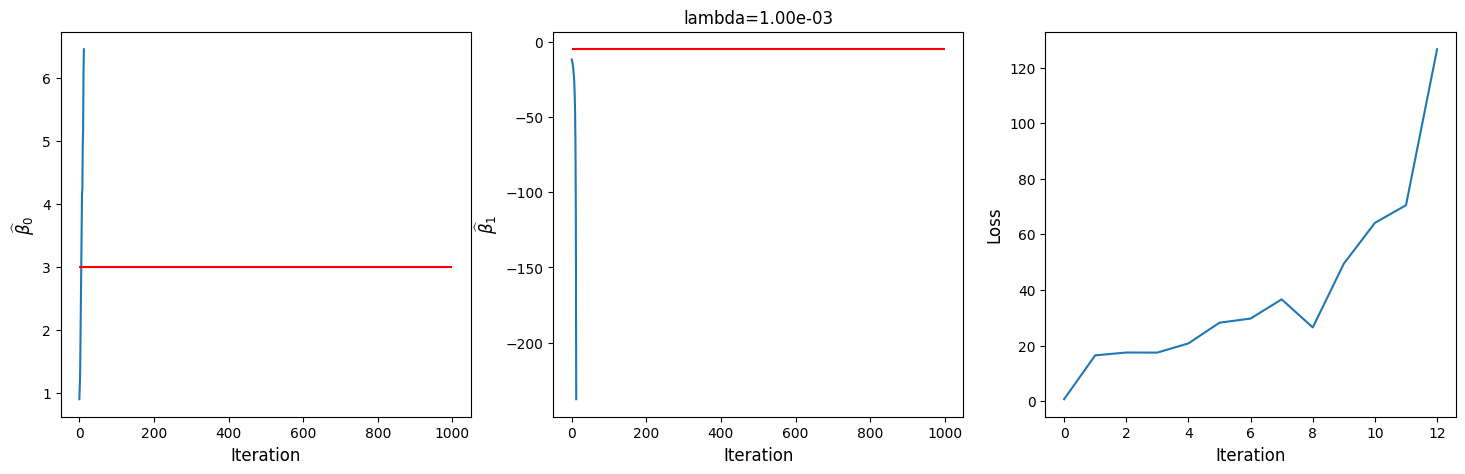

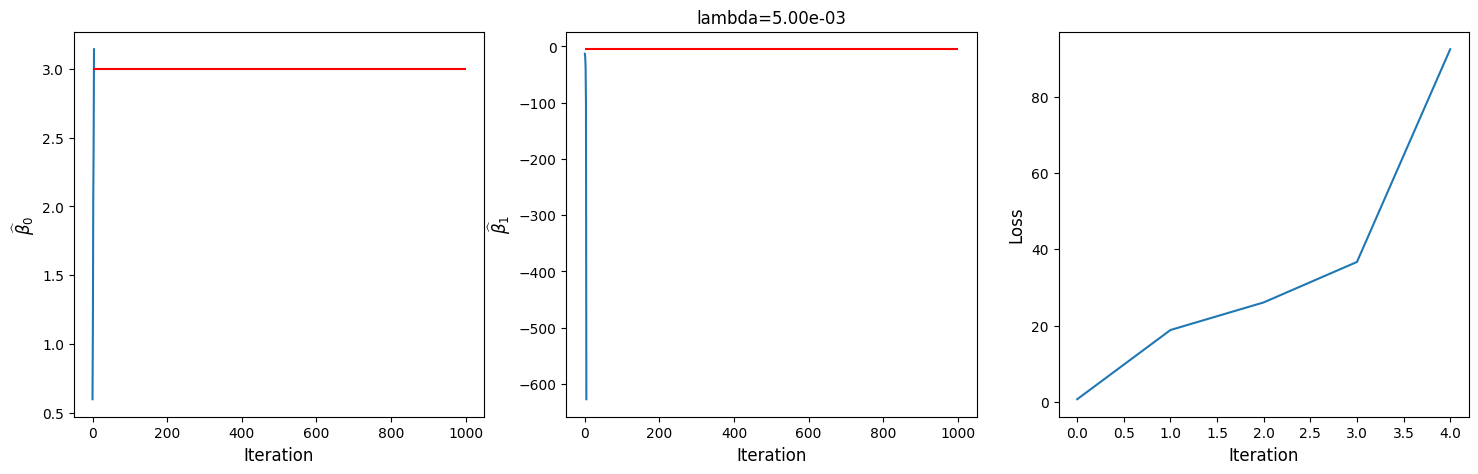

In [155]:
# run this cell, don't change it

for lamb in [0, .001, .005]:
    _, _, beta0_all, beta1_all, loss_all = minibatch_grad_descent(batch_size=500, lamb=lamb)
    plot_betas_and_loss(beta0_all, beta1_all, loss_all, title = 'lambda=%.2e' % lamb)

Comment on these results:

1. Describe what causes the differences in the plots across the three regularization levels.
1. Does one of the three runs give a better estimate than the others? Why or why not?


**[Put your answers in this markdown cell]**

### 2.6 Batch size and stochastic gradient descent

Repeat 2.3 with different batch sizes, 1,10,100,1000. How do the plots change as we change batch size? Are the changes consistent with your expectation? Why or why not? Do you think we should use larger batch sizes or smaller ones? How do you reconcile the results with the prevalent use of mini-batch gradient descent rather than SGD and batch gradient descent?

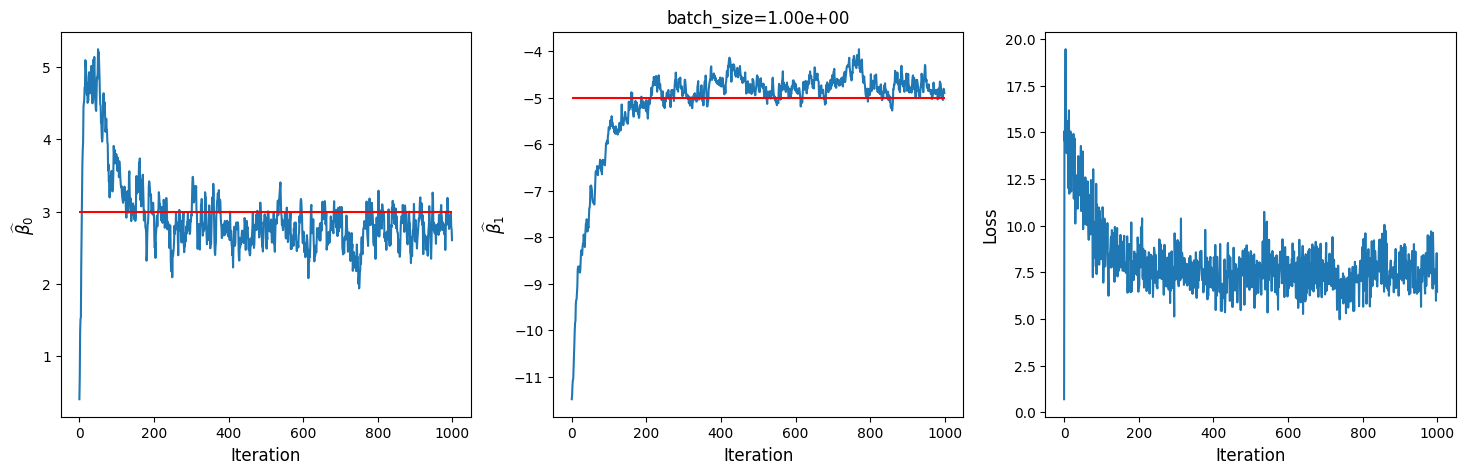

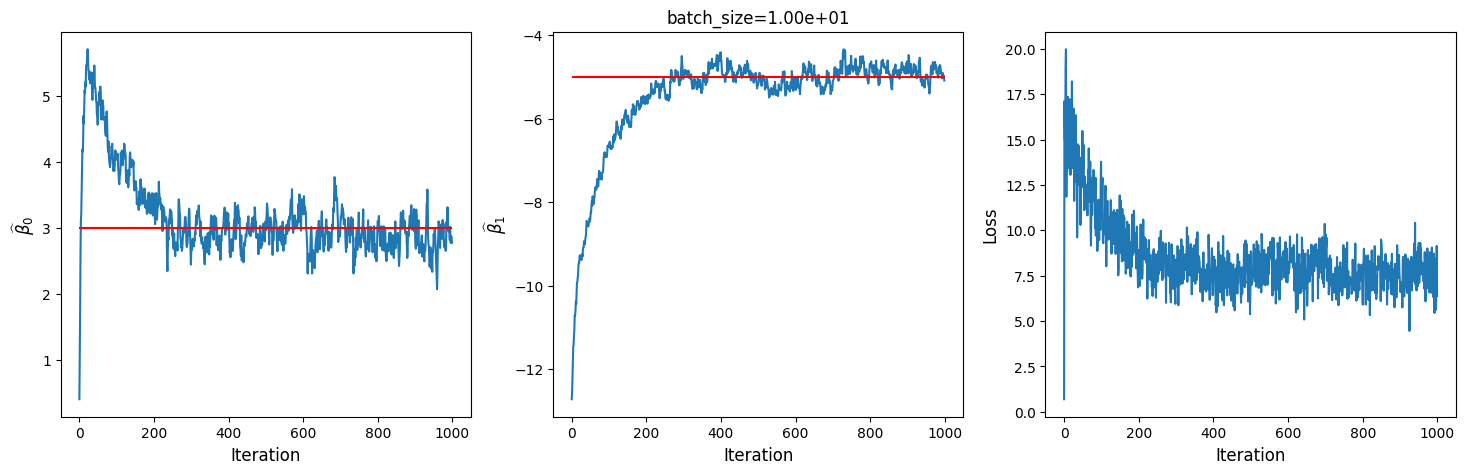

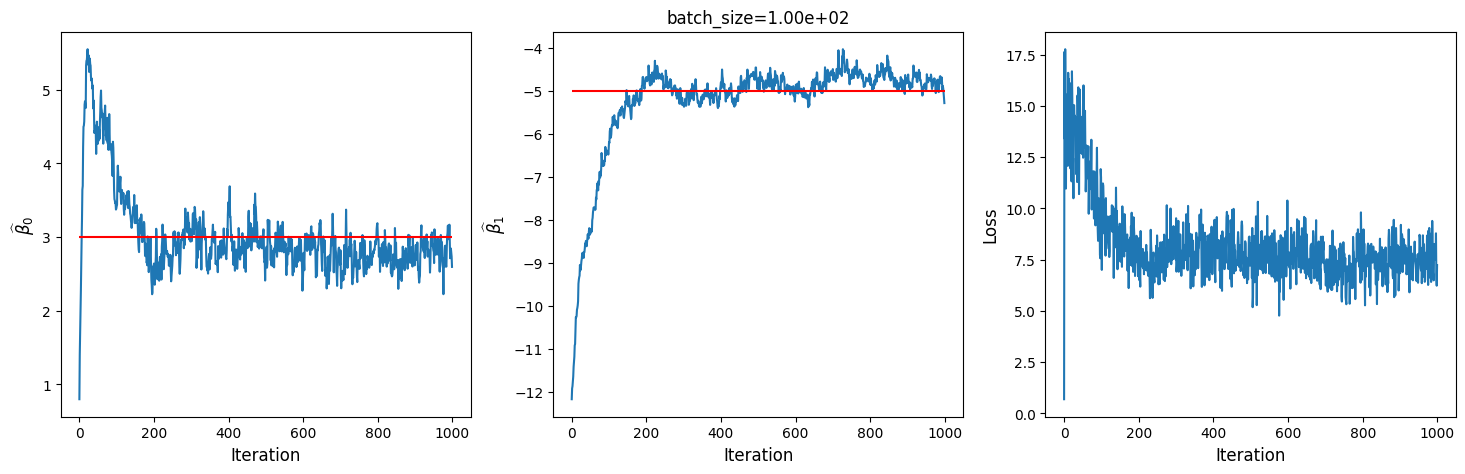

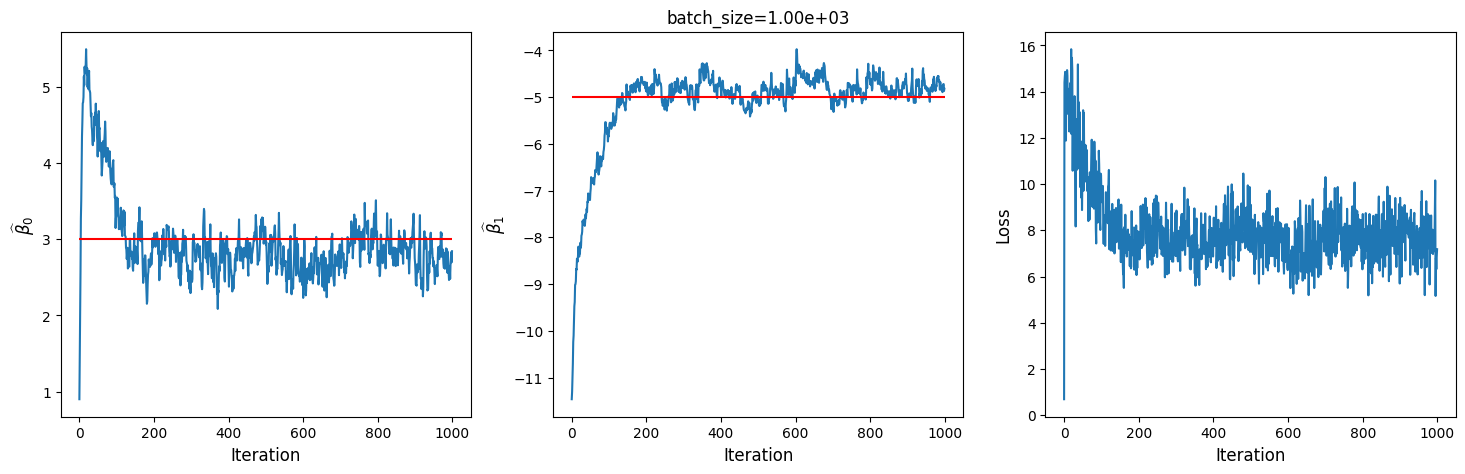

In [156]:
# run this cell, don't change it

for batch_size in [1, 10, 100, 1000]:
    iterations = int(10000/batch_size)
    _, _, beta0_all, beta1_all, loss_all = minibatch_grad_descent(batch_size=batch_size, lamb=0,iterations=1000)
    plot_betas_and_loss(beta0_all, beta1_all, loss_all, title = 'batch_size=%.2e' % batch_size)

Comment on these results:

1. Describe what causes the differences in the plots across the three batch sizes.
2. Does one of the three runs give a better estimate than the others? Why or why not?

**[Put your answers in this markdown cell]**

## Problem 3. Bias and Variance and Trees, Oh My! (20 points)


In this problem you will explore the bias-variance tradeoff for decision trees using a simple toy regression problem. We start by importing a few packages.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
%matplotlib inline

The following cell defines and plots the data for this regression problem. The true regression function is `f`; the response `y` is `f` plus noise. The true function is -1 above the line `x1==x2` and 1 below the line. Just run this cell; do not modify it.

In [ ]:
n = 10000
np.random.seed(265)

X = np.random.uniform(low=-1, high=1, size=2*n).reshape(n,2)
f = np.sign(X[:,0] - X[:,1]) + np.sign(X[:,0] + X[:,1])
y = f + np.random.normal(size=n)

fig = plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1], c=f, alpha=.3, s=2.5, cmap='jet')
plt.xlabel('X1')
plt.ylabel('X2')
_ = plt.title('True function')

### 3.1 Build regressions trees with different depth

In this problem you are asked to build a sequence of regression trees using this data, to predict `y` from `x1` and `x2`, varying the tree depth.

* Vary the maximuim tree depth from 1 to 7
* Train each tree on a random set of 500 data points
* Test on the remaining 10000 - 500 data points
* Run 500 trials (train/test splits) for each depth.
* Plot the MSE as a function of the maximum tree depth

The cell below contains some starter code. You may modify this starter code in any way you wish. But be sure to *keep the lines at the end, which plots the mean squared error on the test data versus the depth.*

In [ ]:
trials = 500
tree_depth = np.arange(1, 8)
test_mean_squared_error = np.zeros(len(tree_depth))

from tqdm import tqdm
for d in tqdm(tree_depth):
    rtree = DecisionTreeRegressor(max_depth=d)
    for trial in np.arange(trials):
        ...

fig = plt.figure()
plt.plot(tree_depth, test_mean_squared_error)
plt.xlabel('tree depth')
plt.ylabel('MSE')

### 3.2 What is the best size of tree?

(a) According to your plot above, what is the best tree depth to choose?

(b) If the regression trees were trained on 5000 data points, rather than 500, how would the choice of tree depth change? Would it increase or decrease? Explain why. Try to answer this question without running any code! If you run an experiment, comment on this in your answer.


[Your answer here in Markdown]


### 3.3 Estimate the squared bias and variance
Now estimate the squared bias and variance of the trees as a function of the maximum depth. This is possible in this case because you know the true function `f`, which was defined above. Use the same setup as above:

* Vary the maximuim tree depth from 1 to 7
* Train each tree on a random set of 500 data points
* Run 500 trials for each train/test split.

To estimate the squared bias and variance, evaluate each of the models on each of the $n=10,000$ data points. You can then estimate the squared bias and variance of the predictions $\hat y_i = \hat f(x_i)$ and take the average
over all the data points.

Hint: Consider using the fact that the variance of a random variable can be written as $\mbox{Var}(Z) = \mathbb{E}(Z^2) - \mathbb{E}(Z)^2$.  The cell below contains starter code based on this hint. You will need to use the true regression function `f` defined above as a numpy array.

You may modify this starter code in any way you wish. But be sure to *keep the lines at the end, which plots the squared bias and variance.*

In [ ]:
trials = 500
tree_depth = np.arange(1, 8)
bias_squared = []
variance = []

from tqdm import tqdm
for d in tqdm(tree_depth):
    rtree = DecisionTreeRegressor(max_depth=d)
    E_yhat = np.zeros(n)
    E_yhat_squared = np.zeros(n)
    for trial in np.arange(trials):
        ...

    # just run the following lines (or modify as needed)
    bias_squared.append(np.mean((E_yhat - f)**2))
    variance.append(np.mean(E_yhat_squared - E_yhat**2))


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(tree_depth, bias_squared, 'g-')
ax2.plot(tree_depth, variance, 'r-')
ax1.set_xlabel('tree depth')
ax1.set_ylabel('squared bias', color='g')
_ = ax2.set_ylabel('variance', color='r')

### 3.4 Do the bias and variance make sense?

(a) Explain why your plots of the squared bias and variance make sense, and are consistent with your plot of the MSE computed previously.

(b) What is the (approximate) value of the difference between the MSE and the sum of the squared bias and variance for this data set?


[Your answer here in markdown]
